In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
pd.set_option('max_columns',None)

In [13]:
dataframe = pd.read_csv("AutoInsurance_train.csv", header=0, na_values='-1')

In [14]:
dataframe

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10.0,1,NaN,0,1.0,4,1.0,0,0.0,1,12,2.0,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11.0,1,NaN,0,NaN,11,1.0,1,2.0,1,19,3.0,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,NaN,7.0,1,NaN,0,NaN,14,1.0,1,2.0,1,60,1.0,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7.0,1,0.0,0,1.0,11,1.0,1,3.0,1,104,1.0,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11.0,1,NaN,0,NaN,14,1.0,1,2.0,1,82,3.0,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1.0,10,0.0,0.0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10.0,1,NaN,0,1.0,1,1.0,1,0.0,1,31,3.0,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1.0,3,0.0,0.0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9.0,1,NaN,0,NaN,15,0.0,0,2.0,1,63,2.0,0.387298,0.972145,NaN,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1.0,10,0.0,0.0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7.0,1,NaN,0,NaN,1,1.0,1,2.0,1,31,3.0,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2.0,3,1.0,0.0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11.0,1,NaN,0,NaN,11,1.0,1,2.0,1,101,3.0,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0


In [15]:
dataframe.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10.0,1,NaN,0,1.0,4,1.0,0,0.0,1,12,2.0,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11.0,1,NaN,0,NaN,11,1.0,1,2.0,1,19,3.0,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,NaN,7.0,1,NaN,0,NaN,14,1.0,1,2.0,1,60,1.0,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7.0,1,0.0,0,1.0,11,1.0,1,3.0,1,104,1.0,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11.0,1,NaN,0,NaN,14,1.0,1,2.0,1,82,3.0,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [16]:
#We have 1.Binary data bin,categorical as cat
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   594996 non-null  float64
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595129 non-null  float64
 6   ps_ind_05_cat   589403 non-null  float64
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [17]:
#Count of target Var which is highly imbalanced
dataframe.target.value_counts()

0    573518
1     21694
Name: target, dtype: int64

Text(0, 0.5, 'Frequency')

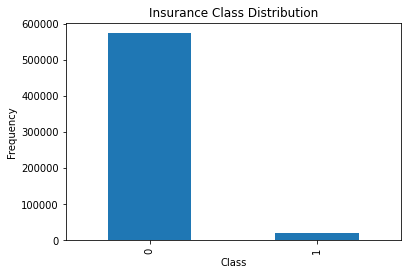

In [18]:
trd=pd.value_counts(dataframe['target'],sort=True)
trd.plot(kind='bar')


plt.title("Insurance Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

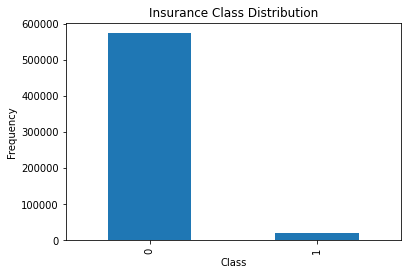

In [19]:
count_classes = pd.value_counts(dataframe['target'],sort=True)
count_classes.plot(kind='bar')

plt.title("Insurance Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [20]:
dataframe.isnull().sum()

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          0
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0


# working on NaN

In [21]:
#Columns containing all NaN values
Columns_nan = dataframe.columns[dataframe.isna().any()].tolist()
Columns_nan

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_03_cat',
 'ps_car_05_cat',
 'ps_car_07_cat',
 'ps_car_09_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_14']

In [22]:
#  'ps_ind_02_cat', 216
#  'ps_ind_04_cat', 83
#  'ps_ind_05_cat', 5809     Done
#  'ps_reg_03',     107772   Done
#  'ps_car_01_cat', 107
#  'ps_car_03_cat', 411231   Done
#  'ps_car_05_cat', 266551   Done
#  'ps_car_07_cat', 11489      Done
#  'ps_car_09_cat', 569
#  'ps_car_11',     5
#  'ps_car_12',     1
#  'ps_car_14'      42620   Done

In [23]:
#First handling missing values in cat columns 
Columns_nan_cat = ['ps_ind_02_cat', 'ps_ind_04_cat','ps_ind_05_cat', 'ps_car_01_cat','ps_car_03_cat','ps_car_05_cat',
 'ps_car_07_cat','ps_car_09_cat',]

<Figure size 1440x1800 with 0 Axes>

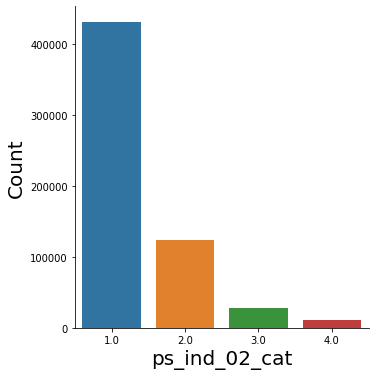

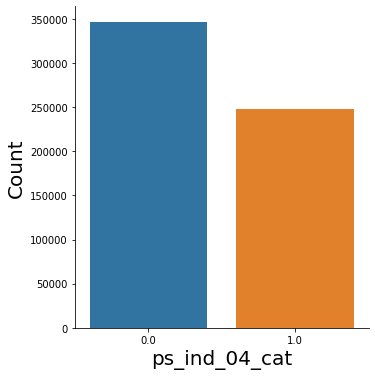

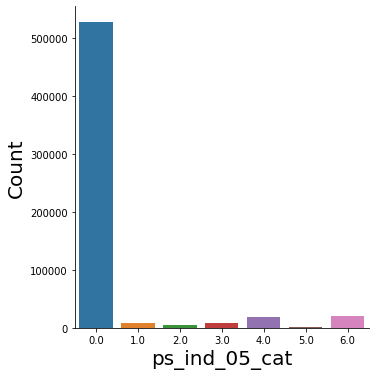

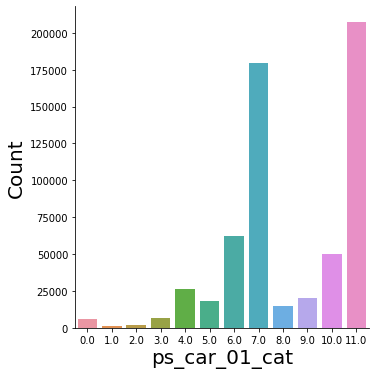

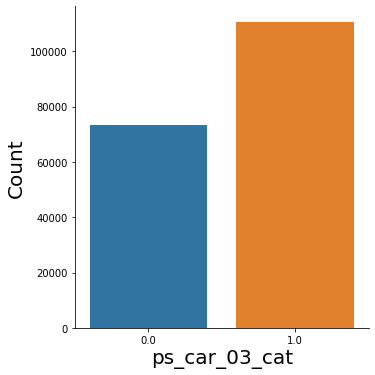

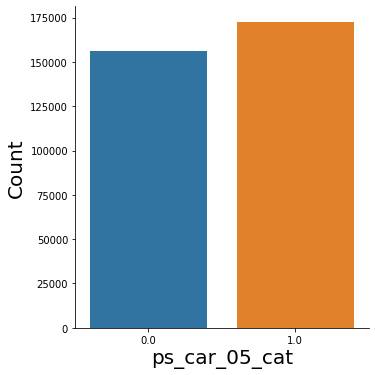

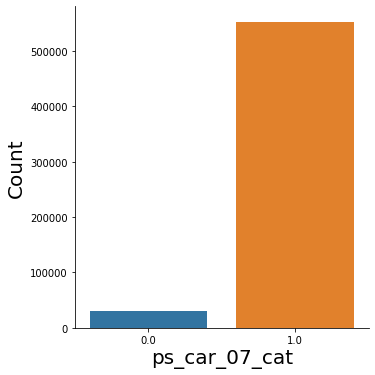

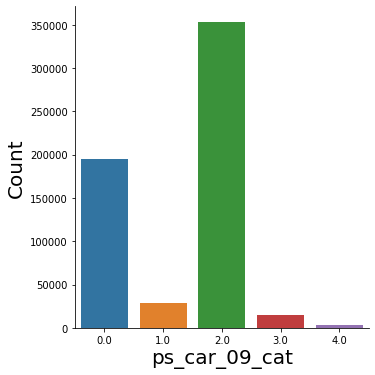

In [24]:
# let's see how data is distributed for every categorical column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in Columns_nan_cat:
    if plotnumber<=8 :     # as there are 9 columns in the data
        sns.catplot(data=dataframe,x=column,kind='count')
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.show()

In [25]:
#dropping nan only for class 0 categorical data
ps_ind_02_cat_drop_0= dataframe.iloc[np.where((dataframe.ps_ind_02_cat.isna()) & (dataframe.target == 0))]

dataframe.drop(ps_ind_02_cat_drop_0.index,axis=0,inplace=True)
dataframe.shape

(595036, 59)

In [26]:
ps_ind_02_cat_drop_0= dataframe.iloc[np.where((dataframe.ps_ind_02_cat.isna()) & (dataframe.target == 0))]

dataframe.drop(ps_ind_02_cat_drop_0.index,axis=0,inplace=True)
dataframe.shape

(595036, 59)

In [27]:
ps_ind_04_cat_drop_0= dataframe.iloc[np.where((dataframe.ps_ind_04_cat.isna()) & (dataframe.target == 0))]

dataframe.drop(ps_ind_04_cat_drop_0.index,axis=0,inplace=True)
dataframe.shape

(595032, 59)

In [28]:
ps_ind_05_cat_drop_0= dataframe.iloc[np.where((dataframe.ps_ind_05_cat.isna()) & (dataframe.target == 0))]

dataframe.drop(ps_ind_05_cat_drop_0.index,axis=0,inplace=True)
dataframe.shape

(589755, 59)

In [29]:
ps_car_01_cat_drop_0= dataframe.iloc[np.where((dataframe.ps_car_01_cat.isna()) & (dataframe.target == 0))]

dataframe.drop(ps_car_01_cat_drop_0.index,axis=0,inplace=True)
dataframe.shape

(589732, 59)

In [30]:
ps_car_03_cat_drop_0= dataframe.iloc[np.where((dataframe.ps_car_03_cat.isna()) & (dataframe.target == 0))]

dataframe.drop(ps_car_03_cat_drop_0.index,axis=0,inplace=True)
dataframe.shape

(192355, 59)

In [31]:
ps_car_05_cat_drop_0= dataframe.iloc[np.where((dataframe.ps_car_05_cat.isna()) & (dataframe.target == 0))]

dataframe.drop(ps_car_05_cat_drop_0.index,axis=0,inplace=True)
dataframe.shape

(192286, 59)

In [32]:
ps_car_07_cat_drop_0= dataframe.iloc[np.where((dataframe.ps_car_07_cat.isna()) & (dataframe.target == 0))]

dataframe.drop(ps_car_07_cat_drop_0.index,axis=0,inplace=True)
dataframe.shape

(186741, 59)

In [33]:
ps_car_09_cat_drop_0= dataframe.iloc[np.where((dataframe.ps_car_09_cat.isna()) & (dataframe.target == 0))]

dataframe.drop(ps_car_09_cat_drop_0.index,axis=0,inplace=True)
dataframe.shape

(186484, 59)

In [34]:
#dropping nan only for class 0 continous data
Columns_nan_cont = ['ps_reg_03','ps_car_11','ps_car_12','ps_car_14']
Columns_nan_cont

['ps_reg_03', 'ps_car_11', 'ps_car_12', 'ps_car_14']

In [35]:
ps_reg_03_drop_0= dataframe.iloc[np.where((dataframe.ps_reg_03.isna()) & (dataframe.target == 0))]

dataframe.drop(ps_reg_03_drop_0.index,axis=0,inplace=True)
dataframe.shape

(156019, 59)

In [36]:
ps_car_11_drop_0= dataframe.iloc[np.where((dataframe.ps_car_11.isna()) & (dataframe.target == 0))]

dataframe.drop(ps_car_11_drop_0.index,axis=0,inplace=True)
dataframe.shape

(156018, 59)

In [37]:
ps_car_12_drop_0= dataframe.iloc[np.where((dataframe.ps_car_12.isna()) & (dataframe.target == 0))]

dataframe.drop(ps_car_12_drop_0.index,axis=0,inplace=True)
dataframe.shape

(156017, 59)

In [38]:
ps_car_14_drop_0= dataframe.iloc[np.where((dataframe.ps_car_14.isna()) & (dataframe.target == 0))]

dataframe.drop(ps_car_14_drop_0.index,axis=0,inplace=True)
dataframe.shape

(140959, 59)

In [39]:
dataframe.isna().sum()

id                    0
target                0
ps_ind_01             0
ps_ind_02_cat        40
ps_ind_03             0
ps_ind_04_cat        33
ps_ind_05_cat       484
ps_ind_06_bin         0
ps_ind_07_bin         0
ps_ind_08_bin         0
ps_ind_09_bin         0
ps_ind_10_bin         0
ps_ind_11_bin         0
ps_ind_12_bin         0
ps_ind_13_bin         0
ps_ind_14             0
ps_ind_15             0
ps_ind_16_bin         0
ps_ind_17_bin         0
ps_ind_18_bin         0
ps_reg_01             0
ps_reg_02             0
ps_reg_03          3060
ps_car_01_cat        34
ps_car_02_cat         0
ps_car_03_cat     13450
ps_car_04_cat         0
ps_car_05_cat      8452
ps_car_06_cat         0
ps_car_07_cat       898
ps_car_08_cat         0
ps_car_09_cat        52
ps_car_10_cat         0
ps_car_11_cat         0
ps_car_11             0
ps_car_12             0
ps_car_13             0
ps_car_14          1723
ps_car_15             0
ps_calc_01            0
ps_calc_02            0
ps_calc_03      

In [40]:
#impute nan as mode for categorical data
def impute_nan_cat(dataframe,variable):
    most_frequent_category=dataframe[variable].mode()[0]
    dataframe[variable].fillna(most_frequent_category,inplace=True)

In [41]:
for feature_cat in ['ps_ind_02_cat','ps_ind_04_cat','ps_ind_05_cat','ps_car_01_cat','ps_car_03_cat','ps_car_05_cat',
                 'ps_car_07_cat','ps_car_09_cat']:
    impute_nan_cat(dataframe,feature_cat)

In [42]:
dataframe.isna().sum()

id                   0
target               0
ps_ind_01            0
ps_ind_02_cat        0
ps_ind_03            0
ps_ind_04_cat        0
ps_ind_05_cat        0
ps_ind_06_bin        0
ps_ind_07_bin        0
ps_ind_08_bin        0
ps_ind_09_bin        0
ps_ind_10_bin        0
ps_ind_11_bin        0
ps_ind_12_bin        0
ps_ind_13_bin        0
ps_ind_14            0
ps_ind_15            0
ps_ind_16_bin        0
ps_ind_17_bin        0
ps_ind_18_bin        0
ps_reg_01            0
ps_reg_02            0
ps_reg_03         3060
ps_car_01_cat        0
ps_car_02_cat        0
ps_car_03_cat        0
ps_car_04_cat        0
ps_car_05_cat        0
ps_car_06_cat        0
ps_car_07_cat        0
ps_car_08_cat        0
ps_car_09_cat        0
ps_car_10_cat        0
ps_car_11_cat        0
ps_car_11            0
ps_car_12            0
ps_car_13            0
ps_car_14         1723
ps_car_15            0
ps_calc_01           0
ps_calc_02           0
ps_calc_03           0
ps_calc_04           0
ps_calc_05 

In [43]:
#impute nan as median for continous data
def impute_nan_cont(dataframe,variable_cont):
    most_frequent_cont=dataframe[variable_cont].median()
    dataframe[variable_cont].fillna(most_frequent_cont,inplace=True)

In [44]:
for feature_cont in ['ps_reg_03','ps_car_14']:
    impute_nan_cont(dataframe,feature_cont)

In [45]:
dataframe.isna().sum().any()

False

In [46]:
dataframe.target.value_counts()

0    119265
1     21694
Name: target, dtype: int64

In [47]:
x=dataframe.drop(['target','id'],axis=1)
y=dataframe['target']

In [50]:
from  sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33, random_state=42)

In [52]:
import xgboost as xgb
import pickle
from sklearn import datasets
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score , roc_curve, roc_auc_score,confusion_matrix
from sklearn.metrics import classification_report

In [55]:
dataframe.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
3,16,0,0,1.0,2,0.0,0.0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7.0,1,0.0,0,1.0,11,1.0,1,3.0,1,104,1.0,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
7,22,0,5,1.0,4,0.0,0.0,1,0,0,0,0,0,0,0,0,13,1,0,0,0.7,0.4,0.607248,11.0,1,0.0,0,0.0,11,1.0,1,2.0,1,30,3.0,0.446990,0.900574,0.374833,3.316625,0.1,0.5,0.1,1,2,7,1,6,1,13,7,1,3,6,1,0,1,0,1,0
9,28,1,1,1.0,2,0.0,0.0,0,1,0,0,0,0,0,0,0,4,0,0,1,0.9,1.4,2.316652,11.0,0,0.0,1,0.0,14,1.0,1,2.0,1,104,2.0,0.447214,1.458184,0.390256,3.605551,0.7,0.8,0.8,2,2,8,2,9,1,11,3,5,0,6,0,1,0,0,1,0
13,43,0,1,1.0,3,1.0,0.0,0,1,0,0,0,0,0,0,0,12,1,0,0,0.7,0.9,0.684197,9.0,1,0.0,0,1.0,6,1.0,1,2.0,1,104,3.0,0.400000,0.983311,0.356090,3.605551,0.8,0.7,0.6,2,1,10,1,8,3,8,2,0,4,3,0,0,1,0,1,0
17,58,0,5,1.0,6,0.0,1.0,1,0,0,0,0,0,0,0,0,4,1,0,0,0.9,0.5,0.810864,11.0,1,1.0,0,0.0,11,1.0,0,2.0,1,104,2.0,0.316228,0.876295,0.320780,3.605551,0.2,0.6,0.1,1,3,8,2,9,1,10,9,1,3,9,0,1,1,0,0,0


In [56]:
# fit model on  training data straight on unbalanced dataset without undersampling or oversampling
model = XGBClassifier(objective='binary:logistic')
model.fit(train_x, train_y)

C:\Users\vasu0\anaconda3\envs\gpu\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:28:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
# cheking training accuracy
y_pred = model.predict(train_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(train_y,predictions)
accuracy

0.9601236737892039

In [58]:
# cheking initial test accuracy
y_pred = model.predict(test_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(test_y,predictions)
accuracy

0.953801835887955

In [59]:
# Confusion Matri

conf_mat = confusion_matrix(test_y,y_pred)
conf_mat

array([[39168,   135],
       [ 2014,  5200]], dtype=int64)

In [60]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [61]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.996565147698649

In [62]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.9510951386528095

In [63]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.973299372553892

In [64]:
auc_plain_xgb = roc_auc_score(test_y, predictions)
auc_plain_xgb

0.8586928871290583

In [65]:
print(classification_report(test_y,predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     39303
           1       0.97      0.72      0.83      7214

    accuracy                           0.95     46517
   macro avg       0.96      0.86      0.90     46517
weighted avg       0.95      0.95      0.95     46517



In [66]:
!pip install imblearn

In [67]:
#Oversampling
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(0.75)

train_x_os,train_y_os = os.fit_sample(train_x,train_y)

print("The nos of classes before fit {}".format(Counter(train_y)))
print("The nos of classes aftyer fit {}".format(Counter(train_y_os)))

C:\Users\vasu0\anaconda3\envs\gpu\lib\site-packages\imblearn\utils\_validation.py:591: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


AttributeError: 'RandomOverSampler' object has no attribute 'fit_sample'

In [68]:
#Using Random Forest with Randomoversample data
from sklearn.ensemble import RandomForestClassifier

classifier_over = RandomForestClassifier()
classifier_over.fit(train_x_os,train_y_os)

y_pred_rand_over = classifier_over.predict(test_x)
print(confusion_matrix(test_y,y_pred_rand_over))
print(classification_report(test_y,y_pred_rand_over))

NameError: name 'train_x_os' is not defined

In [69]:
#Test accuracy
print(accuracy_score(test_y,y_pred_rand_over))

NameError: name 'y_pred_rand_over' is not defined

In [70]:
# Area Under Curve Random forest using RandomOverSampler oversampling tech
auc_rand_over = roc_auc_score(test_y, y_pred_rand_over)
auc_rand_over

NameError: name 'y_pred_rand_over' is not defined

In [71]:
#XGBOost using RandomOverSampler oversampling tech

model_over = XGBClassifier(objective='binary:logistic')
model_over.fit(train_x_os,train_y_os)


y_pred_xg_over = model_over.predict(test_x)
print(confusion_matrix(test_y,y_pred_xg_over))
print(accuracy_score(test_y,y_pred_xg_over))
print(classification_report(test_y,y_pred_xg_over))

NameError: name 'train_x_os' is not defined

In [72]:
# Area Under Curve XGboost using RandomOverSampler oversampling tech
auc_xg_over = roc_auc_score(test_y, y_pred_xg_over)
auc_xg_over

NameError: name 'y_pred_xg_over' is not defined

In [73]:
# Confusion Matri

conf_mat2 = confusion_matrix(test_y,y_pred_xg_over)
conf_mat2

true_positive = conf_mat2[0][0]
false_positive = conf_mat2[0][1]
false_negative = conf_mat2[1][0]
true_negative = conf_mat2[1][1]

NameError: name 'y_pred_xg_over' is not defined

In [225]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.967228964710073

In [226]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.9509693558474046

In [227]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9590302479880926

In [229]:
#we are getting somewhat ok results Using Random Forest with Randomoversample data
====================
Confusion Matrix
====================
[[39155   148]
 [ 2461  4753]]



=====================
Classification report
=====================
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     39303
           1       0.97      0.66      0.78      7214

    accuracy                           0.94     46517
   macro avg       0.96      0.83      0.88     46517
weighted avg       0.95      0.94      0.94     46517


==============
Test Accuracy
==============
0.9439129780510351

===============
AUC Score

0.8275460803446549

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 15)